In [134]:
import numpy as np
import pandas as pd
import tensorflow

In [135]:
df = pd.read_csv("Titanic_passengers.csv")
df.head()

,Surname,First Names,Age,Boarded,Class,Sex,Status
0,Ab ī-Al-Munà,Mr Nās īf Qāsim,26,Cherbourg,3rd,Male,Alive
1,Abbing,Mr Anthony,42,Southampton,3rd,Male,Dead
2,Abbott,Mr Eugene Joseph,14,Southampton,3rd,Male,Dead
3,Abbott,Mrs Rhoda Mary “Rosa”,39,Southampton,3rd,Female,Alive
4,Abbott,Mr Rossmore Edward,16,Southampton,3rd,Male,Dead


In [136]:
pass_data = df[['Age', 'Boarded', 'Class', 'Sex']]
pass_label = df['Status'].astype(str)

In [137]:
from sklearn.preprocessing import LabelEncoder

def categorize_age(age):
  return (age // 10)

pass_data['Age'] = pd.to_numeric(pass_data['Age'], errors='coerce')
pass_data['Age'].fillna(pass_data['Age'].mean(), inplace=True)
pass_data['Age'] = pass_data['Age'].astype(int)
pass_data['Age'] = pass_data['Age'].apply(categorize_age)

encoder_b = LabelEncoder()
pass_data['Boarded'] = pass_data['Boarded'].str.strip().str.lower()
pass_data['Boarded'] = encoder_b.fit_transform(pass_data['Boarded'])

encoder_c = LabelEncoder()
pass_data['Class'] = encoder_c.fit_transform(pass_data['Class'])

encoder_s = LabelEncoder()
pass_data['Sex'] = encoder_s.fit_transform(pass_data['Sex'])

/var/folders/9x/w6hlwnl17tn5m06v9vh_m8jh0000gn/T/ipykernel_80291/1753353306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_data['Age'] = pd.to_numeric(pass_data['Age'], errors='coerce')
/var/folders/9x/w6hlwnl17tn5m06v9vh_m8jh0000gn/T/ipykernel_80291/1753353306.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation 

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pass_data, pass_label, test_size = 0.35, random_state = 42)
print(X_train)
print(y_train)

      Age  Boarded  Class  Sex
701     0        3      2    0
423     4        1      0    0
984     0        3      1    0
1309    2        1      2    1
886     2        3      2    1
...   ...      ...    ...  ...
1095    4        3      0    0
1130    2        3      0    0
1294    2        3      2    1
860     2        1      2    1
1126    1        1      0    0

[856 rows x 4 columns]
701      Dead
423     Alive
984     Alive
1309     Dead
886      Dead
        ...  
1095    Alive
1130    Alive
1294     Dead
860      Dead
1126    Alive
Name: Status, Length: 856, dtype: object


In [139]:
def predict_survival(age, sex, cabin, board, model):
  input = []
  age = categorize_age(age)
  sex = encoder_s.transform([sex])
  cabin = encoder_c.transform([cabin])
  board = encoder_b.transform([board])
  input.append(age)
  input.append(sex[0])
  input.append(cabin[0])
  input.append(board[0])
  pred = model.predict_proba([input])
  pred = round(float((pred[0][0] * 100)), 2)
  return ("The probability of survival is " + str(pred) + "%.")

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

pred = naive_bayes_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("The accuracy of the Naive Bayes classifier is: " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the Naive Bayes classifier is: 69.197%.


In [141]:
print(predict_survival(46, "Male", "3rd", "cherbourg", naive_bayes_model))
print(predict_survival(4, "Female", "2nd", "southampton", naive_bayes_model))

The probability of survival is 27.87%.
The probability of survival is 5.36%.


/Users/xenexjoshi/Titanic prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Users/xenexjoshi/Titanic prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


[Text(0.5296052631578947, 0.9166666666666666, 'x[3] <= 0.5\ngini = 0.463\nsamples = 856\nvalue = [311, 545]'),
 Text(0.32894736842105265, 0.75, 'x[2] <= 1.5\ngini = 0.443\nsamples = 317\nvalue = [212.0, 105.0]'),
 Text(0.4292763157894737, 0.8333333333333333, 'True  '),
 Text(0.19736842105263158, 0.5833333333333334, 'x[2] <= 0.5\ngini = 0.255\nsamples = 173\nvalue = [147, 26]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[0] <= 4.5\ngini = 0.115\nsamples = 98\nvalue = [92, 6]'),
 Text(0.05263157894736842, 0.25, 'x[0] <= 3.5\ngini = 0.049\nsamples = 80\nvalue = [78, 2]'),
 Text(0.02631578947368421, 0.08333333333333333, 'gini = 0.034\nsamples = 57\nvalue = [56, 1]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.15789473684210525, 0.25, 'x[1] <= 2.0\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.13157894736842105, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.18421052631578946, 0.0833333333

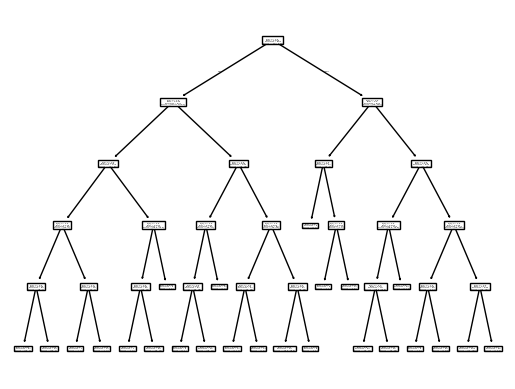

In [142]:
from sklearn import tree

det_tree = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 8, min_samples_leaf = 5, random_state = 42)
det_tree = det_tree.fit(X_train, y_train)
tree.plot_tree(det_tree)

In [143]:
preds = det_tree.predict(X_test)
accuracy = accuracy_score(preds, y_test)
print("The accuracy of the Decision Tree model is " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the Decision Tree model is 78.525%.


In [144]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 5)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [145]:
from sklearn.metrics import accuracy_score

preds = rand_forest.predict(X_test)
accuracy = accuracy_score(preds, y_test)
print("The accuracy of the Random Forest model is " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the Random Forest model is 79.176%.


In [146]:
print(predict_survival(46, "Male", "3rd", "cherbourg", rand_forest))
print(predict_survival(4, "Female", "2nd", "southampton", rand_forest))

The probability of survival is 14.21%.
The probability of survival is 75.57%.


/Users/xenexjoshi/Titanic prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/xenexjoshi/Titanic prediction/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [147]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("The accuracy of the linear SVM classifier is " + str(round(100 * accuracy, 3)) + "%.")

The accuracy of the linear SVM classifier is 78.742%.


In [148]:
from sklearn.model_selection import GridSearchCV

parameters = {
  'C' : [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
  'kernel' : ['linear', 'rbf'],
  'gamma' : [0.01, 0.1, 1],
}

tuned_svm_model = GridSearchCV(estimator = SVC(),
                               param_grid = parameters,
                               cv = 3,
                               verbose = 2)

tuned_svm_model.fit(X_train, y_train)

pred = tuned_svm_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("The accuracy of the hyperparameter-tuned SVM classifier is " + str(round(100 * accuracy, 3)) + "%.")

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.

In [149]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = np.array(X_train, dtype = np.float32)

X_test = scaler.transform(X_test)
X_test = np.array(X_test, dtype = np.float32)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

y_train = np.array(y_train, dtype = np.float32)
y_test = np.array(y_test, dtype = np.float32)

nn_model = Sequential([
  tensorflow.keras.layers.Dense(4, activation = 'relu'),
  tensorflow.keras.layers.Dense(8, activation = 'relu'),
  tensorflow.keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [150]:
history = nn_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 20, batch_size = 8, verbose = 1)

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7805 - loss: 0.5434 - val_accuracy: 0.7809 - val_loss: 0.4986
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7575 - loss: 0.5208 - val_accuracy: 0.7787 - val_loss: 0.5107
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4611 - val_accuracy: 0.7701 - val_loss: 0.4980
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8195 - loss: 0.4314 - val_accuracy: 0.7744 - val_loss: 0.5053
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7716 - loss: 0.4849 - val_accuracy: 0.7744 - val_loss: 0.5021
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4489 - val_accuracy: 0.7744 - val_loss: 0.4971
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7612 - loss: 0.5003 - val_accuracy: 0.7787 - val_loss: 0.4925
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.5004 - val_accuracy: 0.

In [152]:
_, accuracy = nn_model.evaluate(X_test, y_test, verbose = 1)
print(accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7781 - loss: 0.4995 
0.77440345287323
